In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Data Preprocessing:**

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [4]:
# Check for missing values in 'Cuisines' and 'Aggregate rating' columns
missing_values = data[['Cuisines', 'Aggregate rating']].isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values
data.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)

Missing Values:
 Cuisines            9
Aggregate rating    0
dtype: int64


In [5]:
# Replace missing values in 'Cuisines' with "Unknown"
data['Cuisines'].fillna("Unknown", inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = data[['Cuisines', 'Aggregate rating']].isnull().sum()
print("Missing Values After Handling:\n", missing_values_after_handling)

Missing Values After Handling:
 Cuisines            0
Aggregate rating    0
dtype: int64


In [6]:
# Check data types and inspect the 'Aggregate rating' column
print("Data Types:\n", data.dtypes)
print("Unique Values in 'Aggregate rating':\n", data['Aggregate rating'].unique())

# Convert 'Aggregate rating' to numeric if necessary
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'])

Data Types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Unique Values in 'Aggregate rating':
 [4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


In [7]:
# Check the number of observations (ratings) for each cuisine group
cuisine_counts = data['Cuisines'].value_counts()
print("Cuisine Counts:\n", cuisine_counts)

# Filter out cuisines with insufficient observations
min_observation_threshold = 5
valid_cuisines = cuisine_counts[cuisine_counts >= min_observation_threshold].index
data_filtered = data[data['Cuisines'].isin(valid_cuisines)]

Cuisine Counts:
 North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64


In [8]:
# Drop rows with missing values in these columns
data.dropna(subset=['Aggregate rating', 'Votes'], inplace=True)

In [9]:
# Convert data types if necessary
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'])
data['Votes'] = pd.to_numeric(data['Votes'])

In [10]:
# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_restaurants.csv', index=False)

**Exploratory Data Analysis:**

In [11]:
# Load the preprocessed dataset
data = pd.read_csv('preprocessed_restaurants.csv')

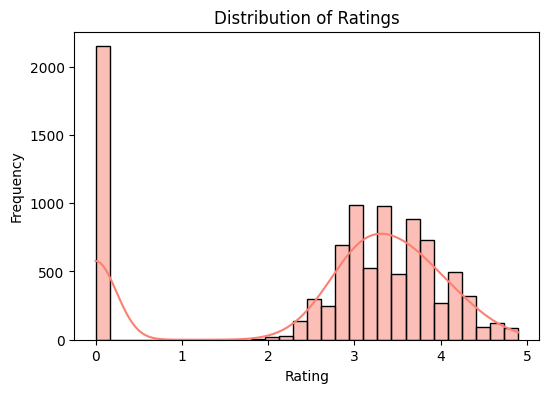

In [12]:
# Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(data['Aggregate rating'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

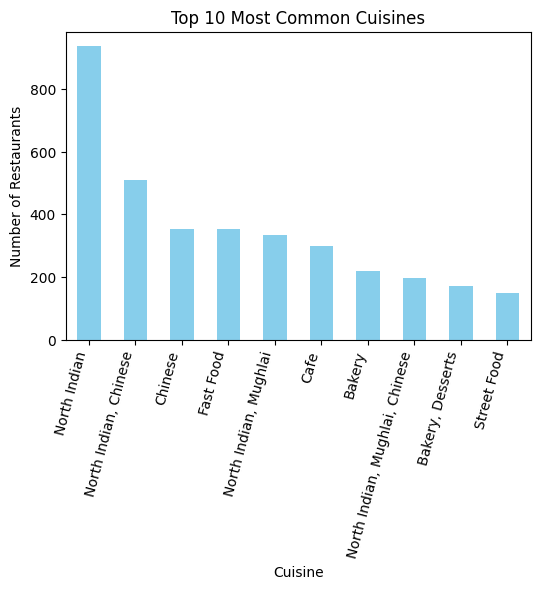

In [13]:
# Distribution of Cuisines
cuisine_counts = data['Cuisines'].value_counts().head(10)
plt.figure(figsize=(6, 4))
cuisine_counts.plot(kind='bar', color='Skyblue')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=75,ha = 'right')
plt.show()

<ipython-input-14-d930cb7e5c2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')


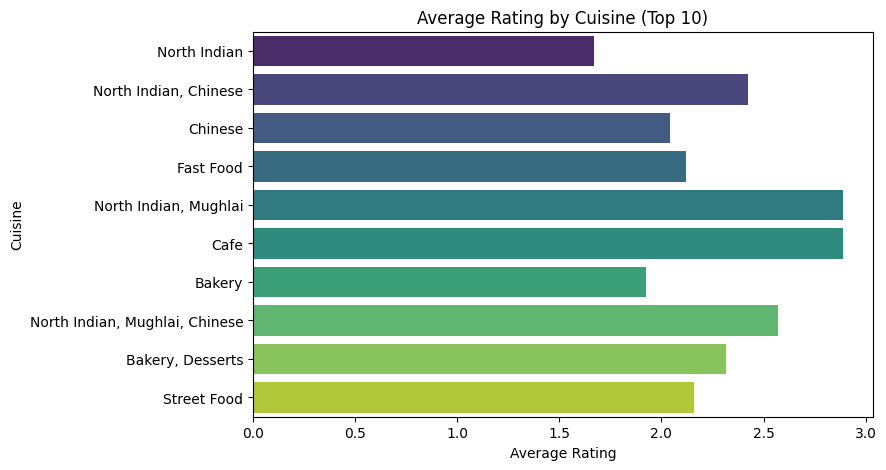

In [14]:
# Rating vs Cuisine (Top 10)
top_10_cuisines = data['Cuisines'].value_counts().head(10).index
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().loc[top_10_cuisines]

plt.figure(figsize=(8, 5))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.title('Average Rating by Cuisine (Top 10)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


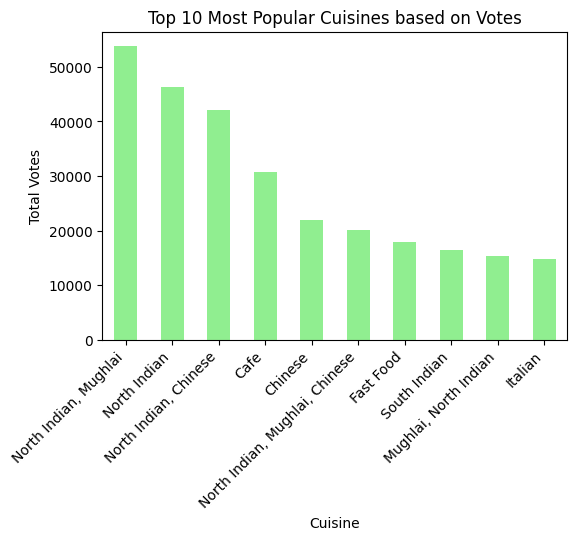

In [15]:
# Most Popular Cuisines based on Votes
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
popular_cuisines.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Popular Cuisines based on Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha = 'right')
plt.show()

**Statistical Analysis:**

In [16]:
from scipy.stats import f_oneway

In [17]:
# Extract unique cuisines
unique_cuisines = data['Cuisines'].unique()
print(unique_cuisines)

['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [18]:
# Group ratings by cuisine
ratings_by_cuisine = [data[data['Cuisines'] == cuisine]['Aggregate rating'] for cuisine in unique_cuisines]

In [19]:
#Check for group variability
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(*ratings_by_cuisine)

# Print Levene's test results
print("Levene's Test Results:")
print("Test Statistic:", levene_test.statistic)
print("P-Value:", levene_test.pvalue)

# Interpret the results
alpha = 0.05  # significance level
if levene_test.pvalue < alpha:
    print("The variability between groups is statistically significant.")
else:
    print("The variability between groups is not statistically significant.")

Levene's Test Results:
Test Statistic: 1.25933560127159
P-Value: 6.935313062243204e-11
The variability between groups is statistically significant.


In [20]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(*ratings_by_cuisine)

In [21]:
# Print results
print("ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

ANOVA Results:
F-Statistic: 2.055119411194431
P-Value: 6.939217931551134e-98


In [22]:
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The differences in ratings among different cuisines are statistically significant.")
else:
    print("There is no significant difference in ratings among different cuisines.")

The differences in ratings among different cuisines are statistically significant.
